In [65]:
pip install quandl


In [67]:
import quandl
import numpy as np


In [68]:
quandl.ApiConfig.api_key = 'FZCdiqtsRgoffcyx2XqB'

In [69]:
df = quandl.get("XNSE/BAJAJ_AUTO")
print(df.head())

                  Open        High  ...  Adjustment Factor  Adjustment Type
Date                                ...                                    
2010-01-01  669.844609  669.844609  ...                NaN              NaN
2010-01-04  673.738166  676.772851  ...                NaN              NaN
2010-01-05  667.554280  670.741654  ...                NaN              NaN
2010-01-06  668.012346  668.012346  ...                NaN              NaN
2010-01-07  657.705870  659.996198  ...                NaN              NaN

[5 rows x 7 columns]


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2010-01-01 to 2018-12-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2347 non-null   float64
 1   High               2347 non-null   float64
 2   Low                2347 non-null   float64
 3   Close              2347 non-null   float64
 4   Volume             2347 non-null   float64
 5   Adjustment Factor  11 non-null     float64
 6   Adjustment Type    11 non-null     float64
dtypes: float64(7)
memory usage: 146.7 KB


In [71]:
x = df.drop("Adjustment Factor",axis=1)
y = x.drop("Adjustment Type",axis=1)
print(y)

                   Open         High          Low        Close    Volume
Date                                                                    
2010-01-01   669.844609   669.844609   669.844609   669.844609       0.0
2010-01-04   673.738166   676.772851   658.488399   661.160448  381510.0
2010-01-05   667.554280   670.741654   652.743492   664.214219  463938.0
2010-01-06   668.012346   668.012346   650.892144   653.945915  465832.0
2010-01-07   657.705870   659.996198   639.421418   642.475188  329288.0
...                 ...          ...          ...          ...       ...
2018-12-25  2550.461719  2550.461719  2550.461719  2550.461719       0.0
2018-12-26  2540.211758  2574.003867  2499.305522  2559.775610  410582.0
2018-12-27  2587.202446  2587.296053  2524.204970  2562.022177  558049.0
2018-12-28  2577.841751  2583.504972  2538.386423  2543.768822  358369.0
2018-12-31  2562.958247  2586.359984  2536.748301  2546.249406  406069.0

[2347 rows x 5 columns]


In [72]:
y = y[['Close']]
print(y.head())

                 Close
Date                  
2010-01-01  669.844609
2010-01-04  661.160448
2010-01-05  664.214219
2010-01-06  653.945915
2010-01-07  642.475188


In [73]:
# Variable for prediction for future days
forecast = 10
y['Prediction'] = y[['Close']].shift(-forecast)

print(y.tail())

                  Close  Prediction
Date                               
2018-12-25  2550.461719         NaN
2018-12-26  2559.775610         NaN
2018-12-27  2562.022177         NaN
2018-12-28  2543.768822         NaN
2018-12-31  2546.249406         NaN


In [74]:
w = y.drop(['Prediction'],1)
w = w[:-forecast]
print(w)

                  Close
Date                   
2010-01-01   669.844609
2010-01-04   661.160448
2010-01-05   664.214219
2010-01-06   653.945915
2010-01-07   642.475188
...                 ...
2018-12-11  2564.455958
2018-12-12  2666.300318
2018-12-13  2654.786663
2018-12-14  2642.664563
2018-12-17  2659.326600

[2337 rows x 1 columns]


In [75]:
q=y['Prediction']
q=q[:-forecast]
print(q)

Date
2010-01-01     659.194583
2010-01-04     662.553731
2010-01-05     678.032531
2010-01-06     694.942787
2010-01-07     686.373143
                 ...     
2018-12-11    2550.461719
2018-12-12    2559.775610
2018-12-13    2562.022177
2018-12-14    2543.768822
2018-12-17    2546.249406
Name: Prediction, Length: 2337, dtype: float64


In [76]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(w,q,test_size =0.20)

In [78]:
svr_rbf = SVR(kernel='rbf',C=1e3)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [79]:
svr_out = svr_rbf.score(x_test,y_test)
print (svr_out)

0.9818192225325229


In [80]:
x_forecast = y.drop(['Prediction'],1)[-forecast:]
print(x_forecast)

                  Close
Date                   
2018-12-18  2659.279797
2018-12-19  2679.966932
2018-12-20  2702.619814
2018-12-21  2628.904342
2018-12-24  2550.461719
2018-12-25  2550.461719
2018-12-26  2559.775610
2018-12-27  2562.022177
2018-12-28  2543.768822
2018-12-31  2546.249406


In [81]:
svr_prediction = svr_rbf.predict(x_forecast)
print(svr_prediction)

[2643.52196441 2662.32995806 2683.34416655 2616.53877065 2549.42563099
 2549.42563099 2557.27451843 2559.17023669 2543.79310719 2545.88014151]


In [82]:
import matplotlib.pyplot as plt


In [83]:
z = y['2018-11-30':]

plt.figure(figsize=(16,8))
plt.title('Bajaj Auto')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(y['Close'])
plt.show()

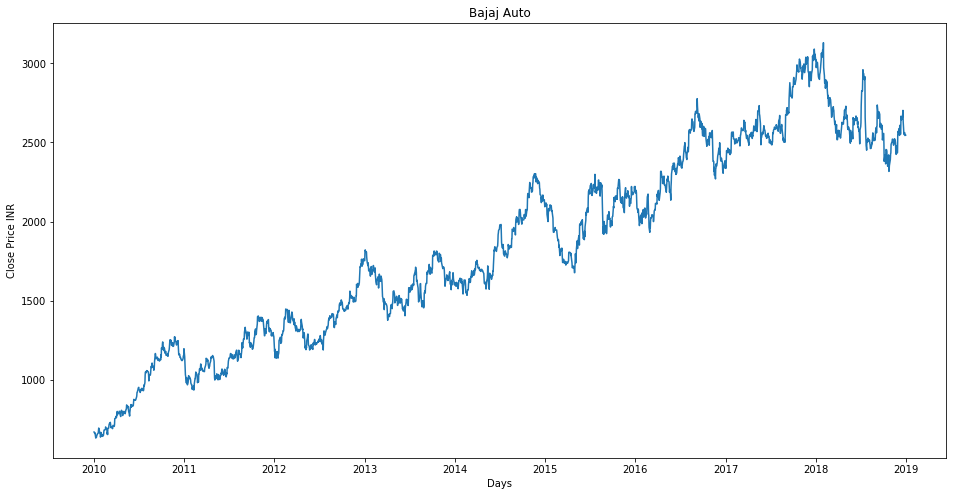

In [84]:
plt.figure(figsize=(16,8))
plt.title('Bajaj Auto')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(y['Close'])
plt.show()

In [85]:
predict = svr_prediction
valid = y[w.shape[0]:]
valid['Predict'] = predict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


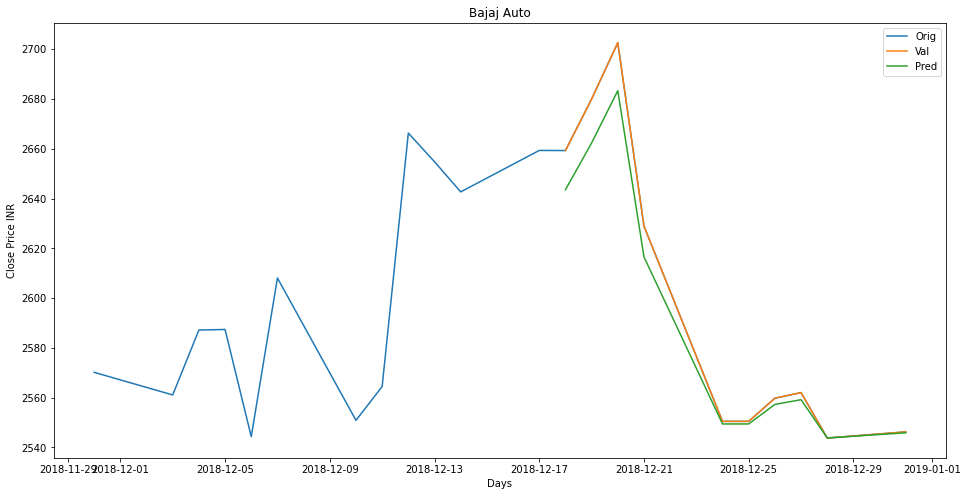

In [87]:
plt.figure(figsize=(16,8))
plt.title('Bajaj Auto')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(z['Close'])
plt.plot(valid[['Close','Predict']])
plt.legend(['Orig','Val','Pred'])
plt.show()